In [ ]:
### Задание 1  
Вернемся к [набору данных о видеоиграх.](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/vgsales.csv)

Ответьте на следующие вопросы:   
   
1) Как критики относятся к спортивным играм?   
2) Критикам нравятся больше игры на PC или на PS4?   
3) Критикам больше нравятся стрелялки или стратегии?   
   
Для каждого вопроса:   
   
 * сформулируйте нулевую и альтернативную гипотезы;   
 * выберите пороговый уровень статистической значимости;   
 * опишите полученные результаты статистического теста.

In [1]:
import pandas as pd
import numpy as np
import re
from scipy import stats as st
import glob
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [2]:
df = pd.read_csv('vgsales.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


### 1) Как критики относятся к спортивным играм?

In [4]:
### выберем данные с отметкой критиков
df_crit = df[['Genre', 'Platform', 'Critic_Score']].dropna()
df_crit

,Genre,Platform,Critic_Score
0,Sports,Wii,76.0
2,Racing,Wii,82.0
3,Sports,Wii,80.0
6,Platform,DS,89.0
7,Misc,Wii,58.0
...,...,...,...
16700,Shooter,PC,61.0
16701,Puzzle,GC,53.0
16702,Puzzle,DS,48.0
16706,Strategy,PC,60.0


In [8]:
alpha = 0.05
result1 = st.ttest_1samp(df_crit.loc[df_crit['Genre'] == 'Sports'].Critic_Score, 70)

print(result1)

if (result1.statistic < 0) & (result1.pvalue / 2 < alpha):
    print('Отвергаем нулевую гипотезу, средняя оценка критиков меньше 70')
else:
    print('Не отвергаем нулевую нулевую гипотезу, критикам нравятся спортивные игры')

Ttest_1sampResult(statistic=4.900329475499578, pvalue=1.0885489197416262e-06)
Не отвергаем нулевую нулевую гипотезу, критикам нравятся спортивные игры


### 2) Критикам нравятся больше игры на PC или на PS4?

In [21]:
result2 = st.ttest_ind(df_crit.loc[df_crit['Platform'] =='PC'].Critic_Score,\
                      df_crit.loc[df_crit['Platform'] =='PS4'].Critic_Score, equal_var=False)
print(result2)
if (result2.pvalue < alpha) & (result2.statistic > 0):
    print('Отвергаем нулевую гипотезу, критики выше оценивают игры на платформе PC')
elif (result2.pvalue < alpha) & (result2.statistic < 0):
    print('Отвергаем нулевую гипотезу, критики выше оценивают игры на платформе PS4')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=4.3087588262138725, pvalue=2.067249157283479e-05)
Отвергаем нулевую гипотезу, критики выше оценивают игры на платформе PC


### 3) Критикам больше нравятся стрелялки или стратегии?

In [23]:
result3 = st.ttest_ind(df_crit.loc[df_crit['Genre'] =='Shooter'].Critic_Score,\
                      df_crit.loc[df_crit['Genre'] =='Strategy'].Critic_Score, equal_var=False)
print(result3)
if (result3.pvalue < alpha) & (result3.statistic > 0):
    print('Отвергаем нулевую гипотезу, критики выше оценивают игры типа Стрелялки')
elif (result3.pvalue < alpha) & (result3.statistic < 0):
    print('Отвергаем нулевую гипотезу, критики выше оценивают Стратегии ')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=-2.2972408230640315, pvalue=0.021938989522304823)
Отвергаем нулевую гипотезу, критики выше оценивают Стратегии 


### Задание 2

Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные [здесь](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/spam.csv)) по признаку спама. Для этого:

In [9]:
df = pd.read_csv('spam.csv')
msg_list = df.Message

df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


1) Приведите весь текст к нижнему регистру;

In [30]:
msg_list = [msg.lower() for msg in msg_list]

2) Удалите мусорные символы;

In [31]:
msg_list = [re.sub('[\W_]+',' ', msg) for msg in msg_list]

3) Удалите стоп-слова;

In [ ]:
nltk.download('stopwords')

In [39]:
stopwords = set(stopwords.words('english'))
msg_list = [msg.split() for msg in msg_list]

msg_list = [[word for word in msg if word not in stopwords] for msg in msg_list]

4) Приведите все слова к нормальной форме;

In [41]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Yr\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [42]:
lemmatizer = WordNetLemmatizer()
msg_list = [[lemmatizer.lemmatize(word) for word in msg] for msg in msg_list]

5) Преобразуйте все сообщения в вектора TF-IDF

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
matrix = vectorizer.fit_transform([" ".join(msg) for msg in msg_list])
features = vectorizer.get_feature_names()
matrix = pd.DataFrame(matrix.toarray(), columns=features)

6) Разделите данные на тестовые и тренировочные в соотношении 30/70.

In [44]:
from sklearn.model_selection import train_test_split

data_train, data_test, result_train, result_test = train_test_split(
    matrix, df.Category, test_size = 0.3, random_state = 42
)

7) Постройте модель логистической регрессии, оцените ее точность на тестовых данных;

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(data_train, result_train)

print('Коэффициент детерминации построенной модели:')
print(lda.score(data_test, result_test))

Коэффициент детерминации построенной модели:
0.9677033492822966


8) Опишите результаты

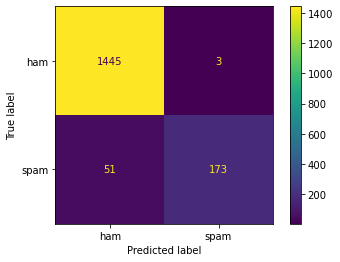

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

result_pred = lda.predict(data_test)
cm = confusion_matrix(result_test, result_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lda.classes_)
disp.plot()

9) Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

In [47]:
df['PredCategory'] = lda.predict(matrix)
error_df = df[df.Category != df.PredCategory]
error_df.head()

,Category,Message,PredCategory
68,spam,"Did you hear about the new ""Divorce Barbie""? I...",ham
191,spam,Are you unique enough? Find out from 30th Augu...,ham
227,spam,Will u meet ur dream partner soon? Is ur caree...,ham
305,spam,SMS. ac Blind Date 4U!: Rodds1 is 21/m from Ab...,ham
368,spam,Here is your discount code RP176781. To stop f...,ham
